In [1]:
import warnings
## No annoying warnings
warnings.filterwarnings('ignore')
# Basic import
## plot within the notebook
%matplotlib inline
# - Astrobject Modules
import numpy      as np

In [2]:
import matplotlib.pyplot as mpl

In [3]:
from scipy import stats

In [4]:
from pyflat import pyflat

In [5]:
import astrobject

In [6]:
from pyflat.pyflat import flatobjects

In [7]:
from astropy import units

In [8]:
from astrobject.utils import mpladdon

***
# Get The Data

In [9]:
from glob import glob
filenames = glob("/Users/mrigault/Desktop/these/code_source/Data/PTF/ptf_starflat/catalogues/*")

Convert the data into SepObjects

In [10]:
reload(flatobjects)

<module 'pyflat.pyflat.flatobjects' from '/Users/mrigault/Libraries/pyflat/pyflat/flatobjects.pyc'>

In [11]:
smap = flatobjects.get_flatfielder(filenames[::20], wcs_extension=2)

***
# Download the Catalogue

In [12]:
smap.download_catalogue("sdss", column_filters={"gmag":"12..21"}, force_it=True)

***
# Access the Data

In [15]:
smap.catalogue.define_around(20*units.arcsec)

In [16]:
catindex = smap.get_catindexes(2, stars_only=True, isolated_only=True)

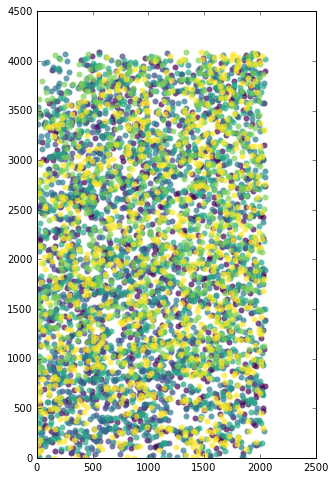

In [17]:
smap.show(catindexes=catindex, ms=6)

In [18]:
#fluxes = -2.5*np.log10(np.asarray(smap.getcat("flux", catindex)))
delta_mag = np.asarray(smap.getcat_residual("mag_auto", catindex))

(-0.05, 0.05)

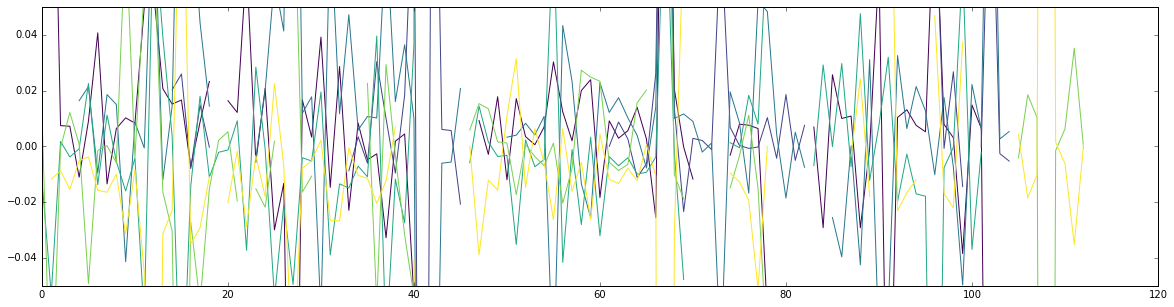

In [19]:
fig = mpl.figure(figsize=[20,5])
ax  = fig.add_subplot(111)
for i in range(smap.nsources):
    ax.plot(delta_mag[i][::10], color=mpl.cm.viridis(np.float(i)/(smap.nsources-1)))
    
ax.set_ylim(-0.05,0.05)

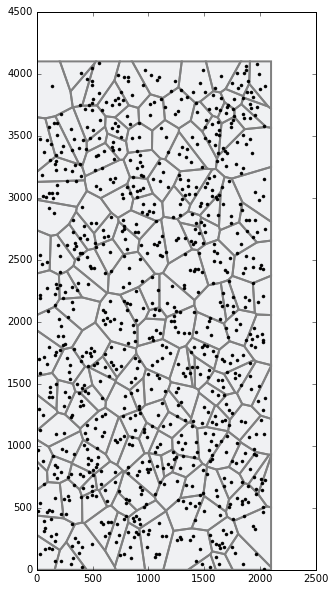

In [25]:
flagnan = np.isnan(xgrid) * np.isnan(ygrid)
#mpoly = shape.get_voronoy_multipolygon(x[::10],y[::10], edges)
fig = mpl.figure(figsize=[5,10])
ax  = fig.add_subplot(111)
ax.plot(xgrid,ygrid,"k.")
_ = [shape.draw_polygon(ax, p, fc=mpl.cm.bone(0.5,0.1), ec="0.5") for p in mpoly]


*** 
# Let's define the Grid

get all the positions

In [20]:
catindex = smap.get_catindexes(0.5, stars_only=True, isolated_only=True)
x        = np.asarray(smap.getcat("x", catindex))
y        = np.asarray(smap.getcat("y", catindex))

In [35]:
from shapely import geometry
from astrobject.utils import shape
edges = geometry.Polygon([[0,0],[0,4100],[2100,4100],[2100,0]])
mpoly = shape.get_voronoy_multipolygon(x[x==x][::30],y[x==x][::30], edges)

In [36]:
grid = flatobjects.PatchGrid()
grid.set_grid(mpoly)

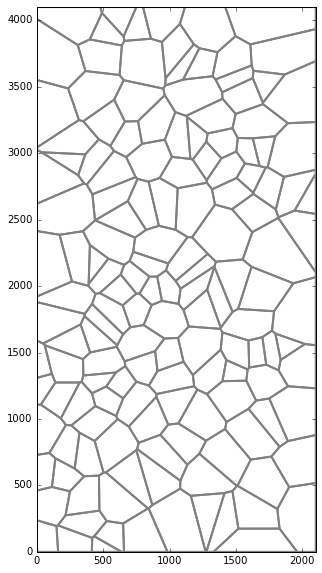

In [37]:
grid.show(cax=False)

***
# Grid defined. Let's measure responses

In [38]:
from shapely import vectorized

In [39]:
magres   = np.asarray(smap.getcat_residual("mag_auto", catindex))

In [40]:
dataout = { i:magres[vectorized.contains(p_, x,y)] for i,p_ in enumerate(grid.grid)}

In [41]:
colors = np.asarray([dataout[i].mean() if len(dataout[i])>2 else np.nan for i,p_ in enumerate(grid.grid)])

In [42]:
size = np.asarray([len(dataout[i]) for i,p_ in enumerate(grid.grid)])

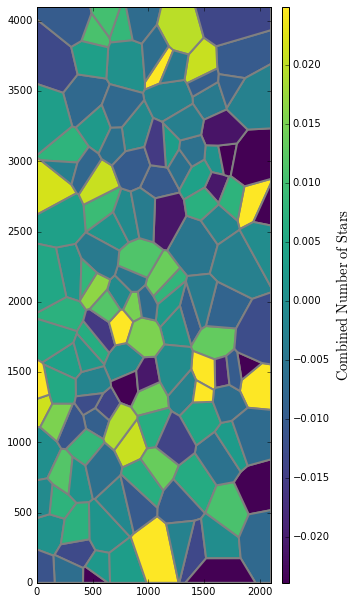

In [44]:
fig = mpl.figure(figsize=[5,10])
axcolor = fig.add_axes([0.1,0.1,0.7,0.8]) 
#axsize  = fig.add_axes([0.55,0.1,0.4,0.8]) 
grid.show(cval=colors,ax=axcolor,cmap=mpl.cm.viridis, clabel=r"$\mathrm{Combined\ Number\ of\ Stars}$")
#grid.show(ax=axsize,cval=size,cmap=mpl.cm.inferno_r)

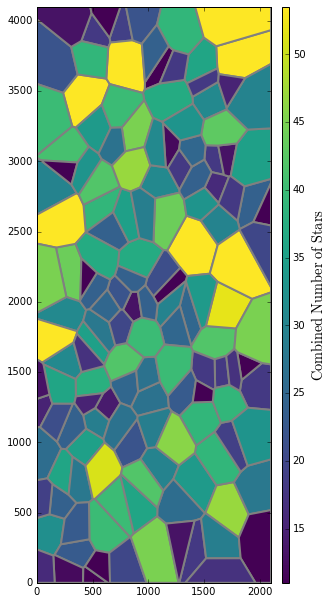

In [45]:
fig = mpl.figure(figsize=[5,10])
axcolor = fig.add_axes([0.1,0.1,0.7,0.8]) 
#axsize  = fig.add_axes([0.55,0.1,0.4,0.8]) 
grid.show(cval=size,ax=axcolor,cmap=mpl.cm.viridis, clabel=r"$\mathrm{Combined\ Number\ of\ Stars}$")
#grid.show(ax=axsize,cval=size,cmap=mpl.cm.inferno_r)

In [ ]:
contours = shape.get_contour_polygon(*np.asarray(rect*([400,500]) + 1000).T)